# AI実践演習(1)提出用
* 学籍番号：2364902
* 氏名：金 奎碩



---


## 演習(1)-1: Irisデータセットの分類を行うニューラルネットワークの実装

### 1. データセットの確認＆ロード

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print('正解データ')
print(iris.target)
print()

print('分類結果のクラス名')
print(iris.target_names)
print()

print('学習データの特徴名')
print(iris.feature_names)
print()

print('学習データ')
print(iris.data.shape)

import pandas as pd
pd.DataFrame(iris.data, columns=iris.feature_names)

X_train = iris['data']
Y_train = iris['target']

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
scaler = StandardScaler()

scaler.fit(X_train)

# データ前処理
X_train = scaler.transform(X_train) # 入力データ標準化
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=3) # One-Hot Encoding



正解データ
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

分類結果のクラス名
['setosa' 'versicolor' 'virginica']

学習データの特徴名
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

学習データ
(150, 4)


データセットの特徴


1.   データセットの大きさ：(150, 4)
  * サンプルの数：150個
  * 特性（feature）の数：4個
   （['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']）
2.   分類結果のクラス情報
  *   0:setosa
  *   1:versicolor
  *   2:virginica


One-Hot Encodingとは整数のラベルをベクトルの形に変換することを意味する。

ここの分類結果のクラス情報を見ると[0, 1, 2]である。しかし、整数のまま使ったらクラスの間の順序を学習する可能性がある。

よって、[0, 1, 2]の形から

* 0 -> [1, 0, 0]
* 1 -> [0, 1, 0]
* 2 -> [0, 0, 1]

の形に変換することをOne-Hot Encodingである。

また、出力関数のSoftmaxが確率値で出力する。

これをOne-Hot Encodingと比較することで損失関数(categorical_crossentropy)が計算できるからである。







### 2. モデル作成

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデル作成
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# モデルコンパイル
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ここでは一番基本的な三つの層を作成する。
1. 入力層(Input Layer)
* データをそのまま受け入れる層（input_shape=(4,)の部分である。）
* 入力データの特性の数である4個のニューロンを持っている。
2. 隠れ層(Hidden Layer)
* Dense(16, activation='relu')
  
  16個のニューロンを持っている。活性化関数は`relu`を使っている
* Dense(8, activation='relu')

  8個のニューロンを持っている。活性化関数は`relu`を使っている
3. 出力層(Output Layer)
* 出力層であり、3個のニューロンを持っている。3個のクラスに分類する問題なので3個のニューロンが存在する。活性化関数は`softmax`を利用している。


### 3. モデル学習

In [3]:
# モデル学習
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=0)

### 4. 学習の推移

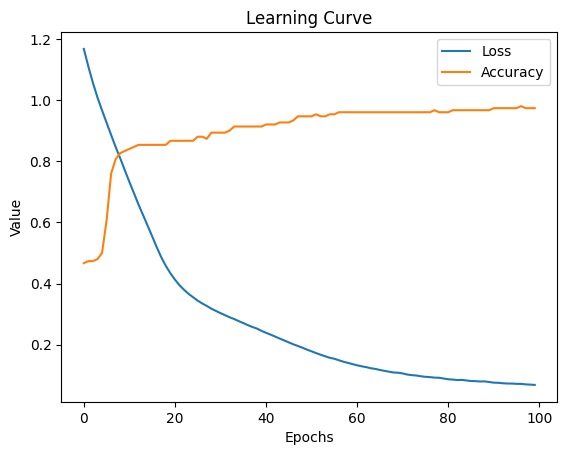

In [4]:
import matplotlib.pyplot as plt

# グラフプロット
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.title('Learning Curve')
plt.show()


グラフを見るとEpochsが増えるたびに損失(Loss)は減って正確度(Accuracy)は増えていることが確認できる。よって、正しく損失は減って正確度は上がる学習を行っている。

https://qiita.com/ohtsuka-shota/items/4e0634d0f0fc3a46784b



---


## 演習(1)-2: 自身の手書き数字を認識するプログラムの作成



### 2-1. 学習させるデバイスの設定

In [5]:
import torch

# デバイス設定
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device")

Using cpu device


### 2-2. データの準備

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# データセットをダウンロードし、トレーニングデータを作成する。
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# DataLoaderを使用して、データセットをミニバッチに分割します
train_dataloader = DataLoader(training_data, batch_size=50, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 12.7MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 348kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.75MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.09MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### 2-3. 学習モデルの設定

In [7]:
from torch import nn

# CNNモデルを定義する
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=1),  # 畳み込み層1
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # プーリング層1
            nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=1),  # 畳み込み層2
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # プーリング層2
            nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=1),  # 畳み込み層3
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # プーリング層3
            nn.Flatten(),
            nn.Linear(64 * 3 * 3, 128),  # 全結合層1
            nn.ReLU(),
            nn.Dropout(0.4),  # 過学習を防ぐためのドロップアウト
            nn.Linear(128, 10),  # 全結合層2 (出力層)
        )

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits

model_cnn = CNN().to(device)
print(model_cnn)

CNN(
  (linear_stack): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=576, out_features=128, bias=True)
    (14): ReLU()
    (15): Dropout(p=0.4, inplace=False)
    (16):

### 2-4. モデルの学習および検証のための関数を定義

In [8]:
from torch import nn

# トレーニング関数を定義
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    training_loss = 0
    correct = 0

    for X, y in dataloader:
        X, y = X.to(device), y.to(device)

        # 予測と損失計算
        pred = model(X)
        loss = loss_fn(pred, y)
        training_loss += loss.item()

        # 正解数を計算
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # パラメータ更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    training_loss /= len(dataloader)
    accuracy = correct / size
    print(f"Training Avg loss: {training_loss:.4f}, Accuracy: {accuracy:.4f}")
    return training_loss, accuracy

# 学習パラメータを設定
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cnn.parameters(), lr=0.01)

# ニューラルネットワークを学習
epochs = 30
training_loss_list = []
training_accuracy_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    training_loss, training_accuracy = train(train_dataloader, model_cnn, loss_fn, optimizer)
    training_loss_list.append(training_loss)
    training_accuracy_list.append(training_accuracy)
    if training_accuracy >= 0.98: # 0.98を超えた場合学習終了（過学習を防ぐため）
        print("Stopping early as accuracy reached 98%.")
        break
# モデル保存
torch.save(model_cnn.state_dict(), "08_cnn_mnist_sample.pth")
print("Training Complete!")


Epoch 1
-------------------------------
Training Avg loss: 0.3783, Accuracy: 0.9018
Epoch 2
-------------------------------
Training Avg loss: 0.0984, Accuracy: 0.9728
Epoch 3
-------------------------------
Training Avg loss: 0.0722, Accuracy: 0.9793
Epoch 4
-------------------------------
Training Avg loss: 0.0578, Accuracy: 0.9834
Stopping early as accuracy reached 98%.
Training Complete!


### 2-5 学習したモデルを手書きで確認

読み込んだ画像ファイル: ['background.png', 'background5.png', 'background1.png', 'backgroun4.png', 'background3.png', 'background2.png']


<ipython-input-14-83c0b5243296>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("08_cnn_mnist_sample.pth", map_location=device))


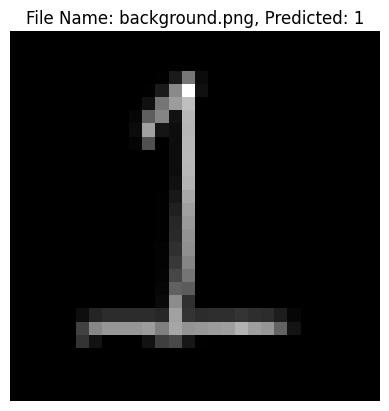

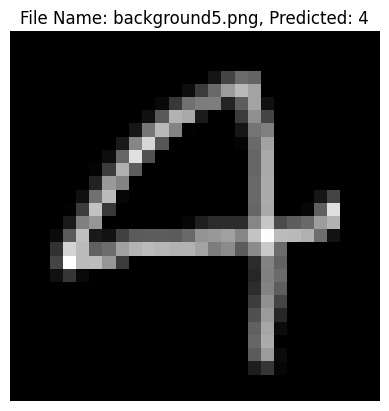

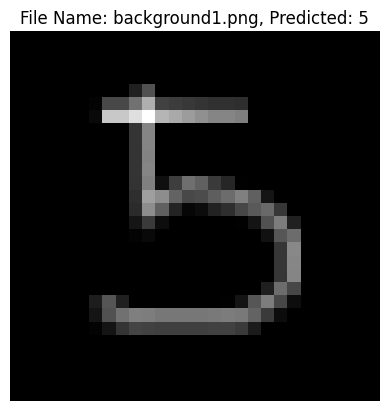

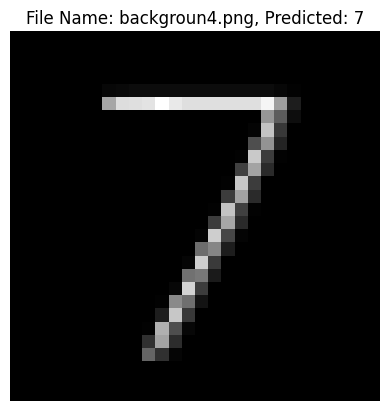

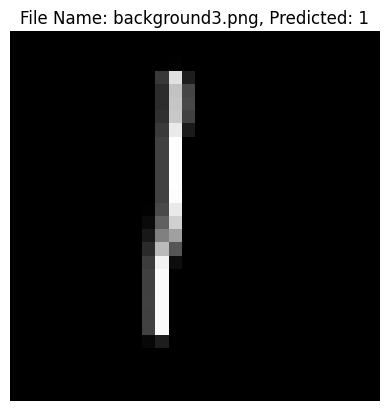

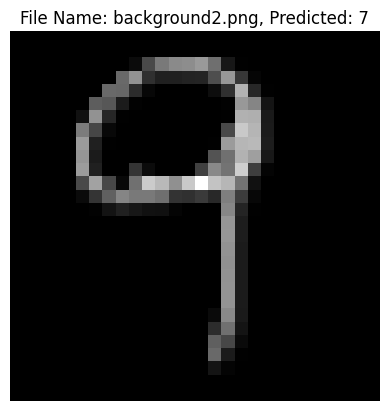

全ての画像の予測結果: [1 4 5 7 1 7]


In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# アップロードされた画像を使ったテスト
folder_name = 'images'  # 手書き画像のフォルダ
file_names = os.listdir(folder_name)  # フォルダ内の画像ファイル名を取得
print("読み込んだ画像ファイル:", file_names)

# データの前処理
images = []
for file_name in file_names:
    image = Image.open(os.path.join(folder_name, file_name))
    image = image.convert('L')  # グレースケール
    image = image.resize((28, 28))  # MNISTフォーマットにリサイズ
    image_tensor = ToTensor()(image).unsqueeze(0)  # テンソル化
    images.append(image_tensor)

x_test = torch.cat(images).to(device)  # テンソルを結合

# モデルをロードして予測
model = CNN().to(device)
model.load_state_dict(torch.load("08_cnn_mnist_sample.pth", map_location=device))
model.eval()

with torch.no_grad():
    predictions = model(x_test)
    predicted_labels = predictions.argmax(1).cpu().numpy()

# 結果を可視化
for i, file_name in enumerate(file_names):
    plt.imshow(x_test[i].squeeze(0).cpu().numpy(), cmap="gray")
    plt.title(f"File Name: {file_name}, Predicted: {predicted_labels[i]}")
    plt.axis("off")
    plt.show()

print("全ての画像の予測結果:", predicted_labels)

### 考察
8回のニューラルネットワークの拡張のコードをそのまま利用して学習させた結果正確度(Accuracy)が0.98を超えなかった。

よって、モデルのパラメータをできるだけ大きくして学習を行った。CNNでは正確度を上げるためにはニューロンの数をできるだけ大きくすることでより良い性能を得ることができる。

しかし、パラメータを大きくすると学習時間が増えることと過学習する可能性が上がる。よって、それを防ぐためにバッチ正規化と目標の正確度になった場合学習を早期終了することで過学習と学習にかかる時間を短縮することができた。